In [1]:
import sys
import os

# Absolute path to your module's directory
module_path = os.path.abspath('/localscratch/zippoema/git/HPA/src/')
if module_path not in sys.path:
    sys.path.insert(0, module_path)

import hpa.cluster as hpacl  # Now this should work
import hpa.util as hpau  # Now this should work

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import gsd.hoomd 

In [3]:
plt.style.use('default')
plt.style.use('/localscratch/zippoema/md_plots/rates_plot.mplstyle')

In [11]:
path_200 = '/localscratch/zippoema/project_ness/simulations/200-tdp43_CAL3/'
path_bckp = '/localscratch/zippoema/zippo_phd_data_bckp/project_hps_phospho_tdp43_natcomm_bckp/'

In [5]:
step = 20
times = np.arange(200,2500,step, dtype=int)-1


### Size of the cluster

In [8]:
nc_5ck1d, np_5ck1d = hpacl.chains_in_condensate(path_200+'sim_200-tdp43-lcd_5-ck1d-open/',
                                                '200-tdp43-lcd_5-com-ck1d-open_CAL3_dump_processed.gsd', 
                                                4, times[:-1])

2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:10<00:00, 10.37it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:10<00:00, 10.73it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:10<00:00, 10.72it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:11<00:00, 10.21it/s]


In [12]:
nc_5ck1d_hps, np_5ck1d_hps = hpacl.chains_in_condensate(path_bckp+'multi-tdp43/simulations_folded-ck1d/sim_5-folded-ck1d/',
                                                '5-folded-ck1d_multi-tdp43_32b_dump_centered.gsd', 
                                                4, times[:-1])

/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:14<00:00,  7.82it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:14<00:00,  7.60it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:15<00:00,  7.22it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:14<00:00,  7.66it/s]


In [10]:
np.savetxt(path_200+'sim_200-tdp43-lcd_5-ck1d-open/size_cond_200-tdp43-lcd_5-com-ck1d-open_CAL3.txt', nc_5ck1d)
np.savetxt(path_200+'sim_200-tdp43-lcd_5-ck1d-open/nphospho_200-tdp43-lcd_5-com-ck1d-open_CAL3.txt', np_5ck1d)

In [13]:
np.savetxt(path_bckp+'multi-tdp43/simulations_folded-ck1d/sim_5-folded-ck1d/size_cond_5-folded-ck1d_multi-tdp43_32b.txt', nc_5ck1d_hps)
np.savetxt(path_bckp+'multi-tdp43/simulations_folded-ck1d/sim_5-folded-ck1d/nphospho_5-folded-ck1d_multi-tdp43_32b.txt', np_5ck1d_hps)

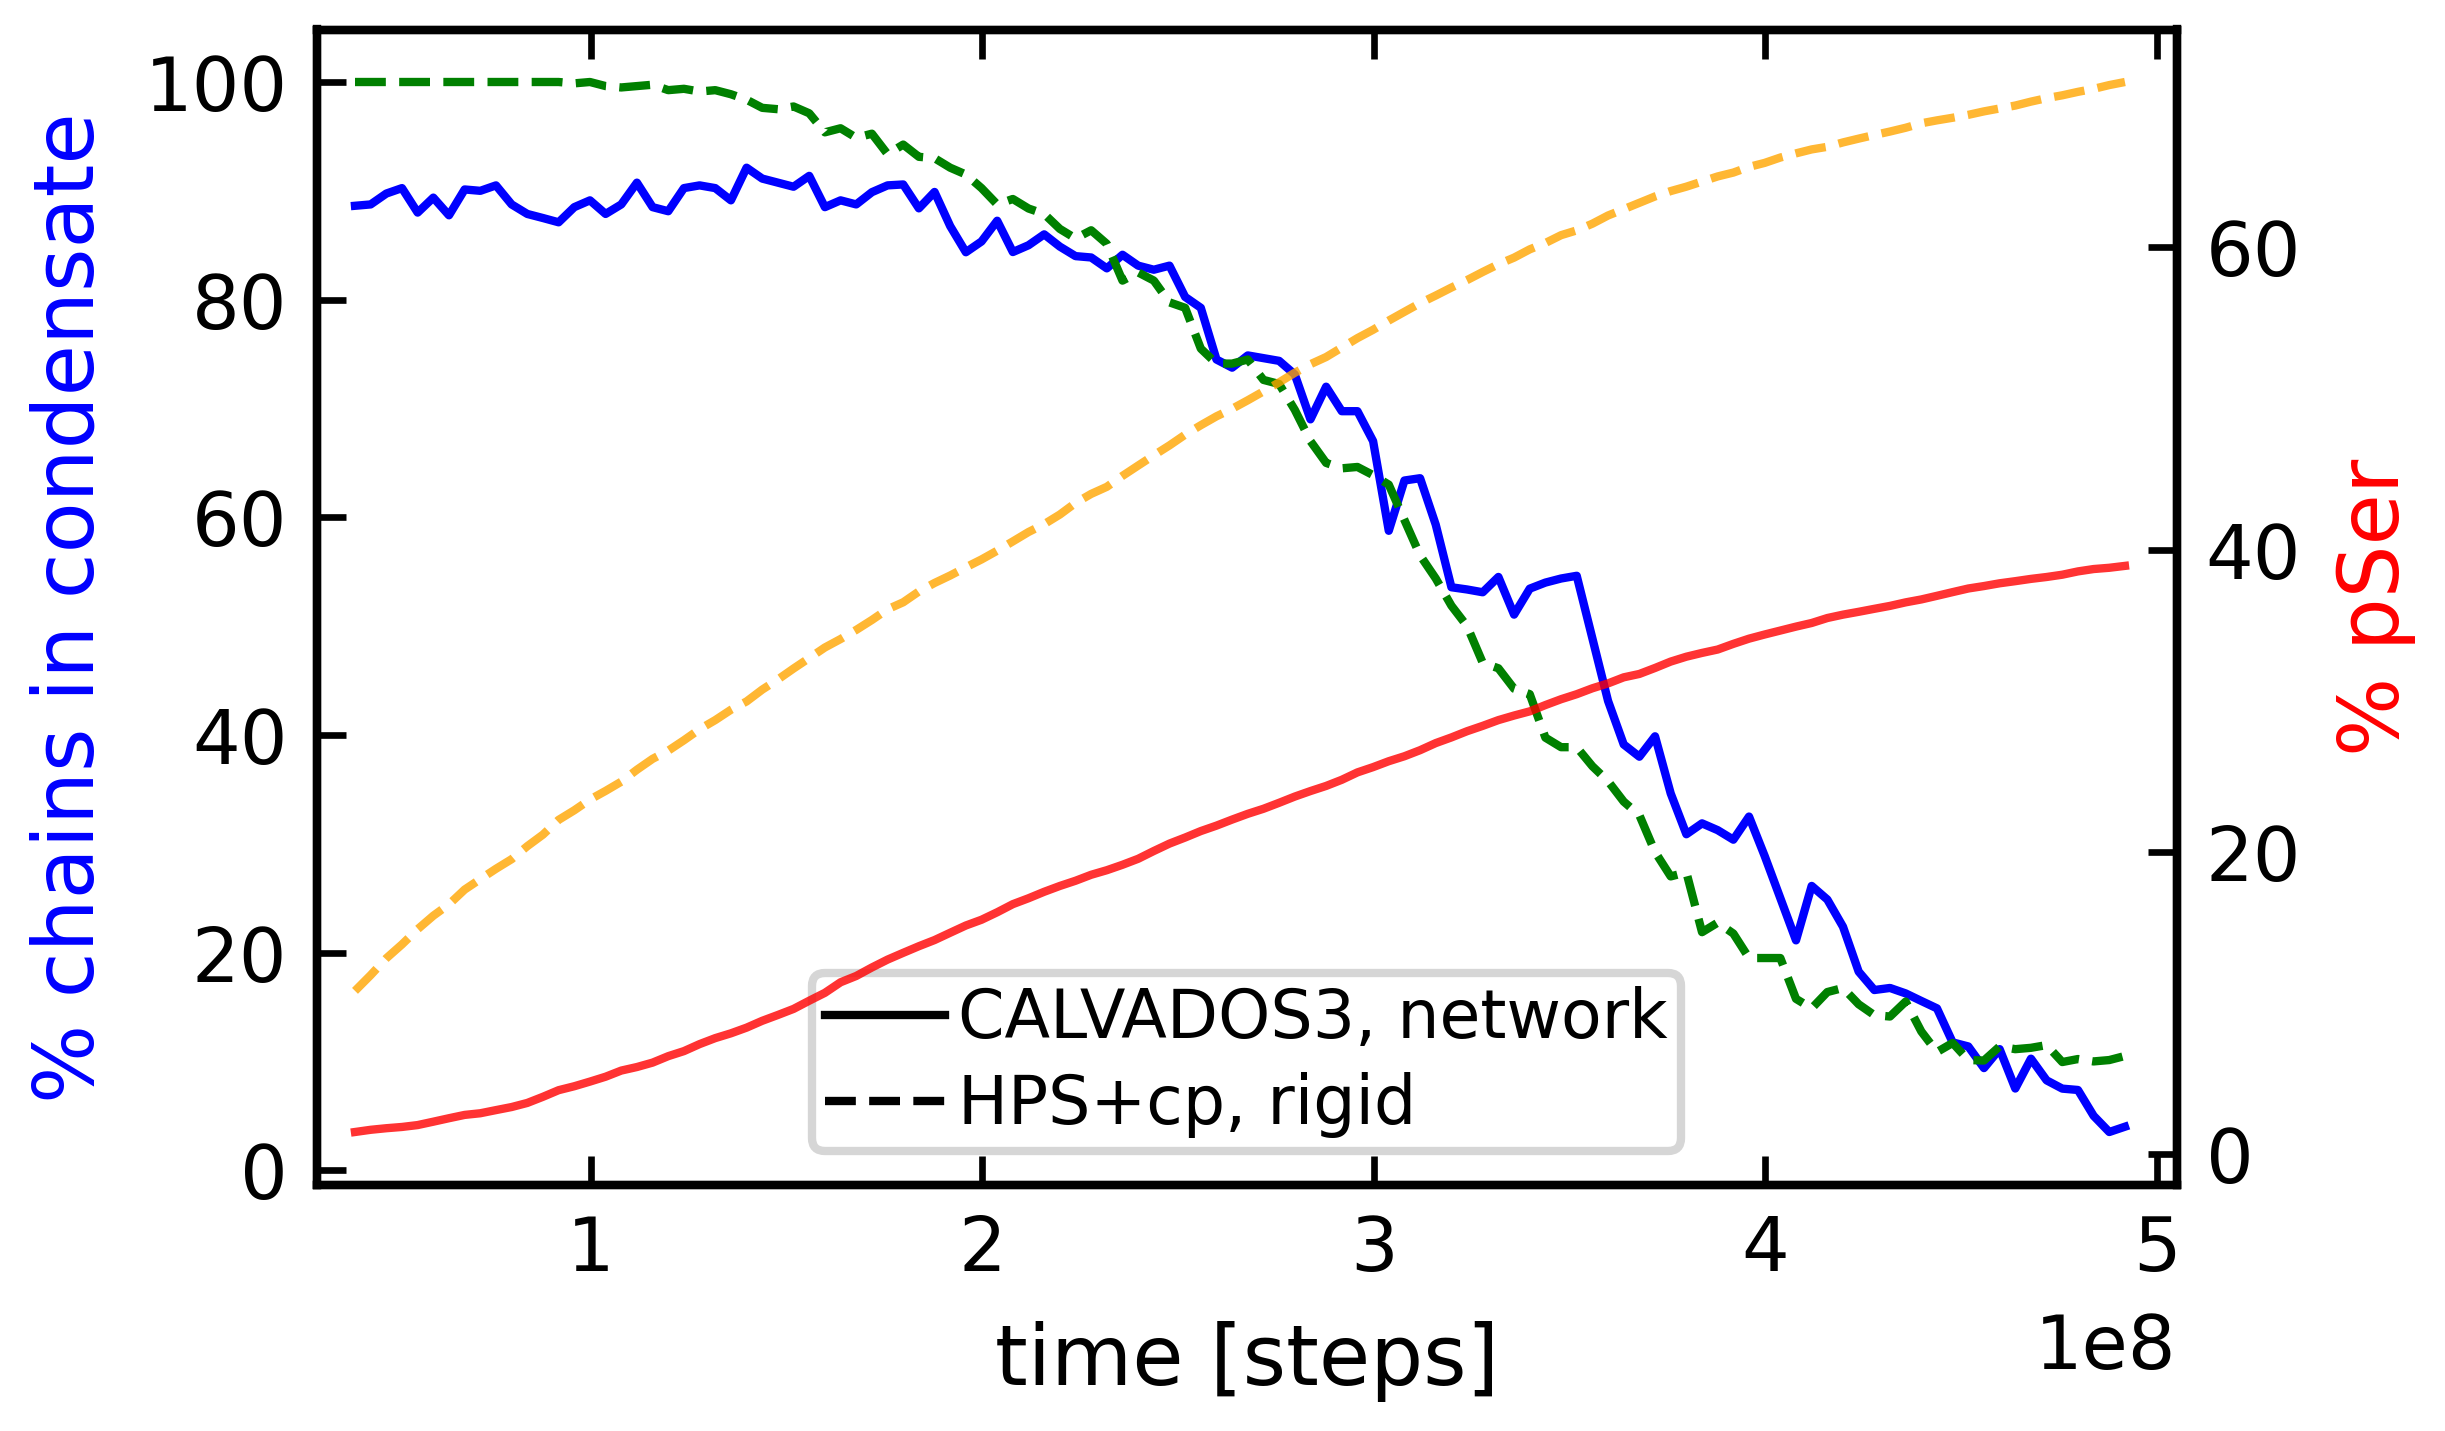

In [17]:
time_step = times*200000
#td_5 = np.where(nc_5ck1d/200 == 0.995)[0][0]

fig, ax1 = plt.subplots(figsize=(4, 2.5))

# Plot the first array with the primary y-axis
ax1.plot(time_step[:-1], nc_5ck1d/2, 'b-')
ax1.plot(time_step[:-1], nc_5ck1d_hps/2, 'g--')
ax1.set_xlabel('time [steps]')
ax1.set_ylabel('% chains in condensate', color='b')
ax1.plot(time_step[0], nc_5ck1d[0]/2, 'k-', label=r'CALVADOS3, network')
ax1.plot(time_step[0], nc_5ck1d[0]/2, 'k--', label=r'HPS+cp, rigid')

#secax = ax1.secondary_xaxis('top')
#secax.set_xticks([ time_step[td_5]], ['$t^\mathrm{5CK1\delta}_\mathrm{diss}$'], fontsize='x-small' )
#secax.tick_params(direction='in', color='grey' , length=0)

#ax1.vlines([time_step[td_5]],ymin=-10,ymax=105, ls=['-.'] ,color='grey', linewidth=1, alpha=0.6)
#ax1.set_ylim((-10,105))

# Create a secondary y-axis and plot the second array
ax2 = ax1.twinx()
ax2.plot(time_step[:-1], np_5ck1d/48, 'r-', alpha=0.8)
ax2.plot(time_step[:-1], np_5ck1d_hps/48, '--', color='orange', alpha=0.8)
ax2.set_ylabel('% pSer', color='r')
#ax2.hlines([ np_5ck1d[td_5]],xmin=0.3*10**8,xmax=5.05*10**8, ls=['-.'], color='grey', linewidth=1, alpha=0.6)
ax2.set_xlim((0.3*10**8,5.05*10**8))

#ax2.plot([time_step[td_5]], [ np_5ck1d[td_5]], 'or', alpha=0.4, ms=5)

ax1.legend(ncols=1, loc='lower center')